<a href="https://colab.research.google.com/github/kuanysh-zhaksylyk/ml_training/blob/main/ML_SELFEDU_TRAINING34_Classtering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

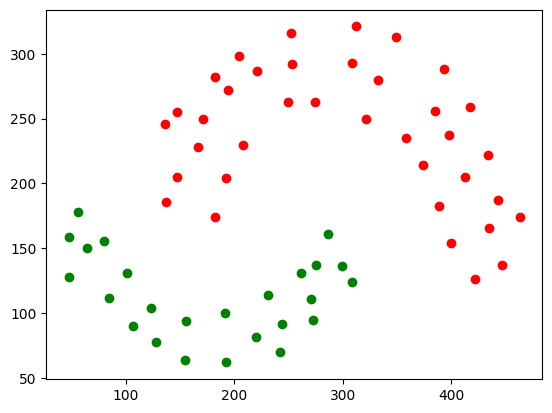

In [ ]:
# Алгоритм DBSCAN, взято с сайта: https://habr.com/ru/post/322034/

from itertools import cycle
from math import hypot
from numpy import random
import matplotlib.pyplot as plt


def dbscan_naive(P, eps, m, distance):
    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
        return [q for q in P if distance(p, q) < eps]

    def expand_cluster(p, neighbours):
        if C not in clusters:
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p)
        while neighbours:
            q = neighbours.pop()
            if q not in visited_points:
                visited_points.add(q)
                neighbourz = region_query(q)
                if len(neighbourz) > m:
                    neighbours.extend(neighbourz)
            if q not in clustered_points:
                clustered_points.add(q)
                clusters[C].append(q)
                if q in clusters[NOISE]:
                    clusters[NOISE].remove(q)

    for p in P:
        if p in visited_points:
            continue
        visited_points.add(p)
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters


# P = [(98, 62), (80, 95), (71, 130), (89, 164), (137, 115), (107, 155), (109, 105), (174, 62), (183, 115), (164, 153), (142, 174), (140, 80), (308, 123), (229, 171), (195, 237), (180, 298), (179, 340), (251, 262), (300, 176), (346, 178), (311, 237), (291, 283), (254, 340), (215, 308), (239, 223), (281, 207), (283, 156)]
# P = [(126, 63), (101, 100), (80, 160), (88, 208), (89, 282), (88, 362), (94, 406), (149, 377), (147, 304), (147, 235), (146, 152), (160, 103), (174, 142), (169, 184), (170, 241), (169, 293), (185, 376), (178, 422), (116, 353), (124, 194), (273, 69), (277, 112), (260, 150), (265, 185), (270, 235), (265, 295), (281, 351), (285, 416), (321, 404), (316, 366), (306, 304), (309, 254), (309, 207), (327, 161), (318, 108), (306, 66), (425, 66), (418, 135), (411, 183), (413, 243), (414, 285), (407, 333), (411, 385), (443, 387), (455, 330), (441, 252), (457, 207), (453, 149), (455, 90), (455, 56), (439, 102), (431, 162), (431, 193), (426, 236), (427, 281), (438, 323), (419, 379), (425, 389), (422, 349), (451, 275), (441, 222), (297, 145), (284, 195), (288, 237), (292, 282), (288, 313), (303, 356), (293, 395), (274, 268), (280, 344), (303, 187), (114, 247), (131, 270), (144, 215), (124, 219), (98, 240), (96, 281), (146, 267), (136, 221), (123, 166), (101, 185), (152, 184), (104, 283), (74, 239), (107, 287), (118, 335), (89, 336), (91, 315), (151, 340), (131, 373), (108, 133), (134, 130), (94, 260), (113, 193)]
P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]

eps = 60    # размер эпсилон-окрестности
m = 5       # минимальное число объектов для полной эпсилон-окрестности

clusters = dbscan_naive(P, eps, m, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
for c, points in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), clusters.values()):
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    plt.scatter(X, Y, c=c)
plt.show()
